<a href="https://colab.research.google.com/github/mohamedyosef101/learning_area/blob/area/TensorFlow/fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify images **of clothing**


In [1]:
# Load the libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
print(f"Last Notebook run: {dt.datetime.now()}")

Last Notebook run: 2024-01-06 18:48:34.927306


# Get the **data**
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset *(by Zalando, MIT License)*.

The contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution *(*28 by 28 pixels*)*

In [2]:
# load the data from keras
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [3]:
### What we want to classify? ###

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# The string represent the index which means zero rep. T-shirt

# Data **Exploration**

In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

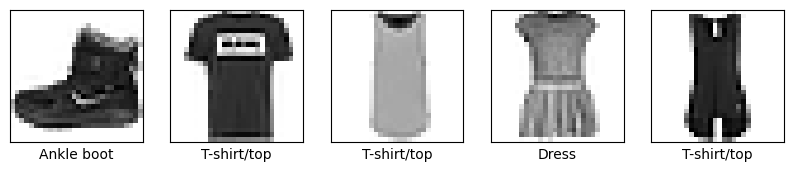

In [14]:
# Verify that the data is in the correct format

plt.figure(figsize=(10, 10))

for i in range(5):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

plt.show()

# Build the **model**

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])